In [2]:
import glob, joblib as jl, numpy as np, pandas as pd, \
    matplotlib.pyplot as plt, warnings, seaborn as sns
from tqdm import tqdm_notebook as tqdm
warnings.simplefilter('ignore')

### Load HHMM likelihood data

In [3]:
fnames = glob.glob('Y:/wavelet/hhmm-results/*regimes_12minrun_manuallabels_5fold.likelihoods.pickle')
fnames = [x for x in fnames if not 'idxmapping' in x]
fnames

['Y:/wavelet/hhmm-results\\10regimes_12minrun_manuallabels_5fold.likelihoods.pickle',
 'Y:/wavelet/hhmm-results\\1regimes_12minrun_manuallabels_5fold.likelihoods.pickle',
 'Y:/wavelet/hhmm-results\\2regimes_12minrun_manuallabels_5fold.likelihoods.pickle',
 'Y:/wavelet/hhmm-results\\3regimes_12minrun_manuallabels_5fold.likelihoods.pickle',
 'Y:/wavelet/hhmm-results\\4regimes_12minrun_manuallabels_5fold.likelihoods.pickle',
 'Y:/wavelet/hhmm-results\\5regimes_12minrun_manuallabels_5fold.likelihoods.pickle',
 'Y:/wavelet/hhmm-results\\6regimes_12minrun_manuallabels_5fold.likelihoods.pickle',
 'Y:/wavelet/hhmm-results\\7regimes_12minrun_manuallabels_5fold.likelihoods.pickle',
 'Y:/wavelet/hhmm-results\\8regimes_12minrun_manuallabels_5fold.likelihoods.pickle',
 'Y:/wavelet/hhmm-results\\9regimes_12minrun_manuallabels_5fold.likelihoods.pickle']

In [4]:
data = pd.concat([pd.read_pickle(fn) for fn in fnames])

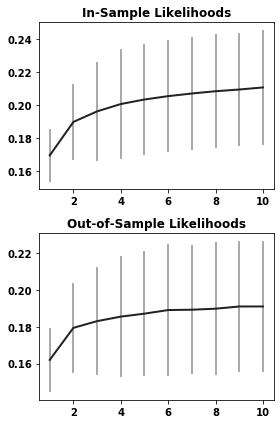

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(4, 6))

# In-sample
for z, insample in enumerate([True, False]):
    # Compute statistics
    logLsDf2 = data.copy()
    logLsDf2.loc[:,'probPerStep'] = np.exp(logLsDf2.logL / logLsDf2.N)
    logLsDf2 = logLsDf2[logLsDf2.inTrainingSample] if insample else logLsDf2[~logLsDf2.inTrainingSample]
    logLsDf2 = logLsDf2[np.isfinite(logLsDf2.logL)]
    logLsDf2 = logLsDf2[~pd.isnull(logLsDf2)]
    logLsDf3 = logLsDf2.groupby(['numRegimes', 'rep', 'fname']).agg({'probPerStep': 'mean'}).reset_index()
    logLsDf3.loc[:,'probPerStep_mean'] = logLsDf3.probPerStep
    logLsDf3.loc[:,'probPerStep_sem'] = 0
    logLsDf4 = logLsDf3.groupby(['numRegimes', ]).agg({'probPerStep': ['mean', 'sem', 'std']}).reset_index()
    logLsDf4.columns = logLsDf4.columns.get_level_values(0)
    logLsDf4.columns = ['numRegimes', 'probPerStep_mean', 'probPerStep_sem', 'probPerStep_std']
    
    # Plot
    ax[z].errorbar(logLsDf4.numRegimes, logLsDf4.probPerStep_mean, yerr=logLsDf4.probPerStep_std, 
                   color='#222222', ecolor='#aaaaaa', linewidth=2, elinewidth=2)
    
    ax[z].set_title(['In-Sample Likelihoods', 'Out-of-Sample Likelihoods'][z])
    
fig.tight_layout()
fig.savefig('C:/Users/acorver/Desktop/paper-figures/Fig_4e.pdf', dpi=250)